<ipython-input-2-9da71b11834a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  americas_df['Date'] = pd.to_datetime(americas_df['Date'])
<ipython-input-2-9da71b11834a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  americas_df['Confirmed'] = americas_df['Confirmed'].apply(lambda x: max(x, 0))
<ipython-input-2-9da71b11834a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

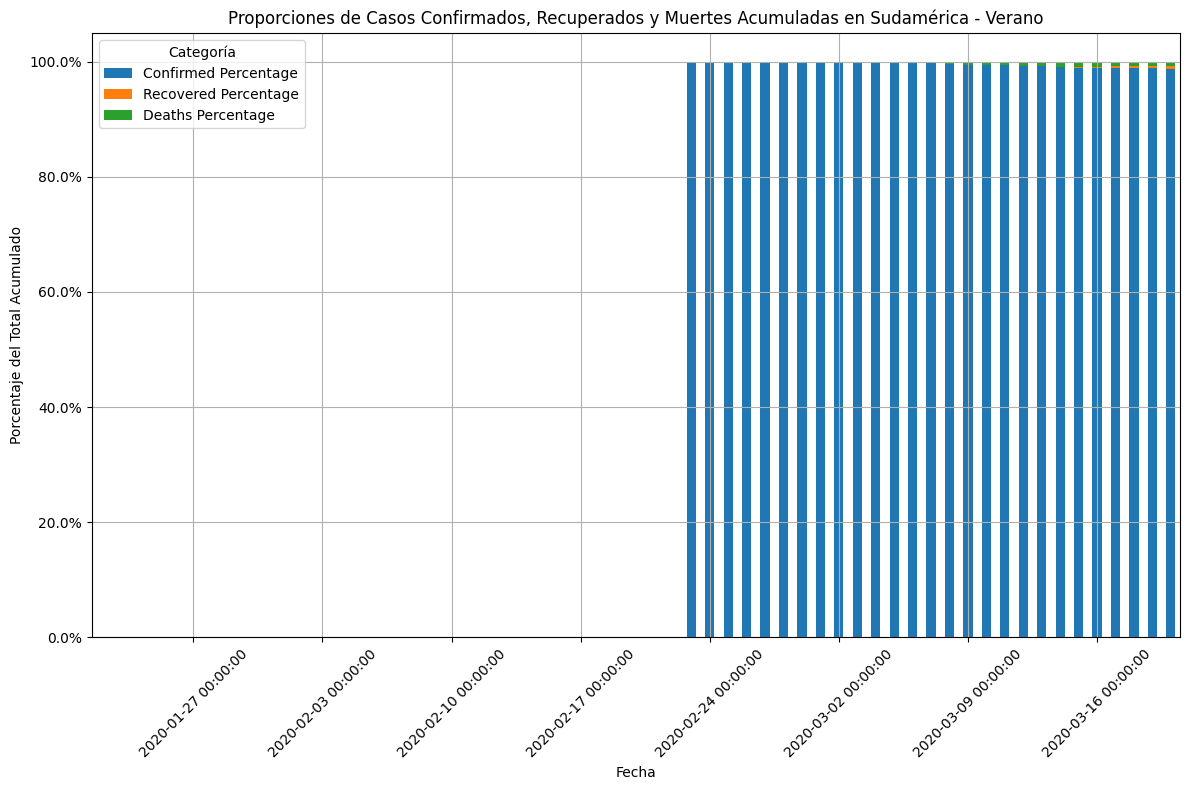

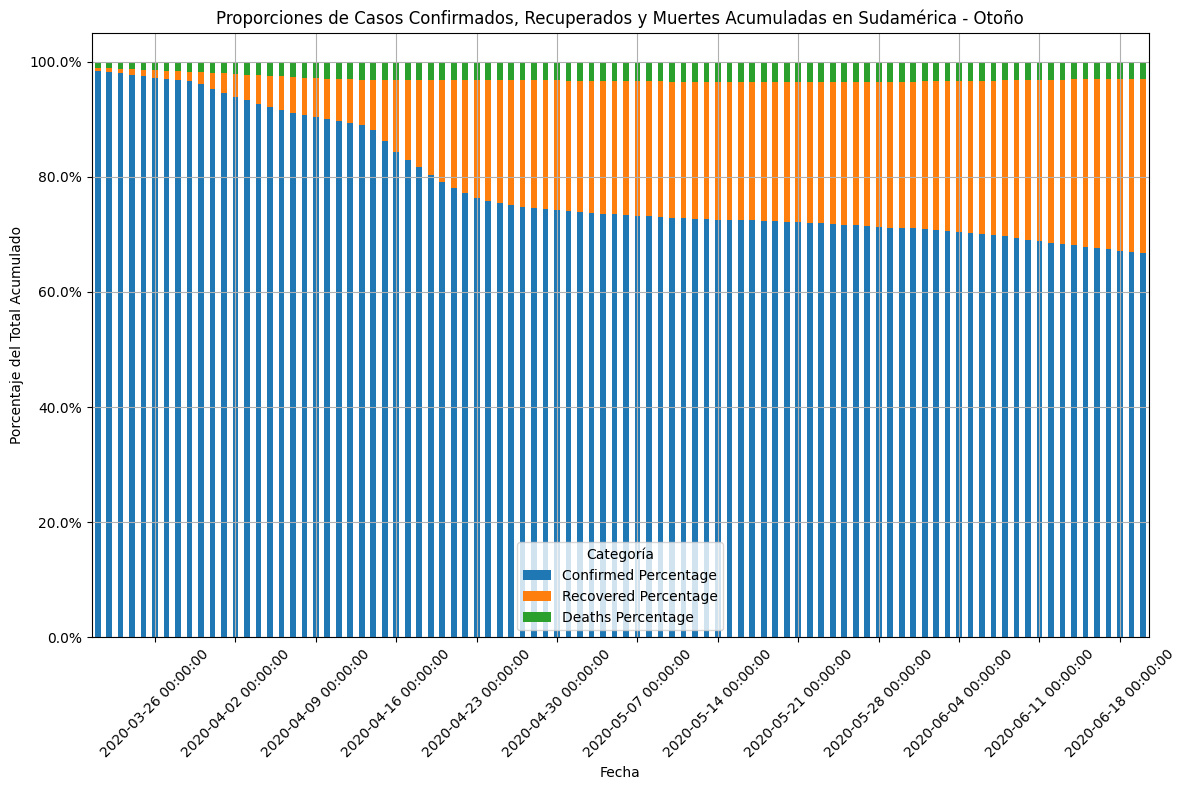

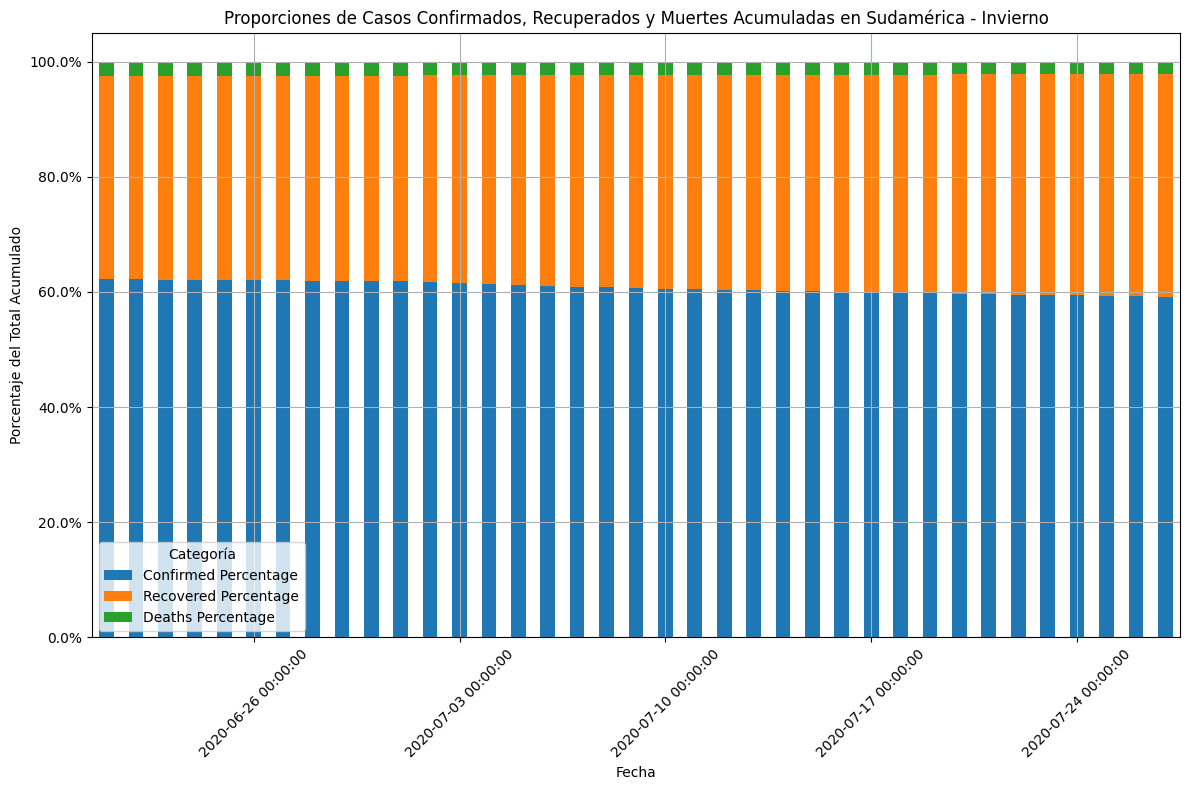

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

df = pd.read_csv('covid_19_clean_complete.csv')

americas_df = df[df['WHO Region'] == 'Americas']

americas_df['Date'] = pd.to_datetime(americas_df['Date'])

americas_df['Confirmed'] = americas_df['Confirmed'].apply(lambda x: max(x, 0))
americas_df['Deaths'] = americas_df['Deaths'].apply(lambda x: max(x, 0))
americas_df['Recovered'] = americas_df['Recovered'].apply(lambda x: max(x, 0))

south_american_countries = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
    'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'
]

south_america_df = americas_df[americas_df['Country/Region'].isin(south_american_countries)]

seasons = {
    'Verano': ('2020-01-22', '2020-03-20'),
    'Otoño': ('2020-03-21', '2020-06-20'),
    'Invierno': ('2020-06-21', '2020-07-27')
}

def percent_formatter(x, pos):
    return f'{x:.1f}%'

for season, (start_date, end_date) in seasons.items():

    season_df = south_america_df[(south_america_df['Date'] >= start_date) & (south_america_df['Date'] <= end_date)]

    daily_data = season_df.groupby('Date').sum().reset_index()

    daily_data = daily_data.sort_values('Date')
    daily_data['Confirmed Accumulated'] = daily_data['Confirmed'].cumsum()
    daily_data['Deaths Accumulated'] = daily_data['Deaths'].cumsum()
    daily_data['Recovered Accumulated'] = daily_data['Recovered'].cumsum()

    daily_data['Total Accumulated'] = daily_data[['Confirmed Accumulated', 'Deaths Accumulated', 'Recovered Accumulated']].sum(axis=1)

    daily_data['Confirmed Percentage'] = (daily_data['Confirmed Accumulated'] / daily_data['Total Accumulated']) * 100
    daily_data['Deaths Percentage'] = (daily_data['Deaths Accumulated'] / daily_data['Total Accumulated']) * 100
    daily_data['Recovered Percentage'] = (daily_data['Recovered Accumulated'] / daily_data['Total Accumulated']) * 100

    fig, ax = plt.subplots(figsize=(12, 8))
    daily_data.set_index('Date')[['Confirmed Percentage', 'Recovered Percentage', 'Deaths Percentage']].plot(kind='bar', stacked=True, ax=ax)

    ax.set_title(f'Proporciones de Casos Confirmados, Recuperados y Muertes Acumuladas en Sudamérica - {season}')
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Porcentaje del Total Acumulado')
    ax.legend(title='Categoría')
    ax.grid(True)

    ax.yaxis.set_major_formatter(FuncFormatter(percent_formatter))
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

    ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()

    plt.show()
